# Mini-projeto: Problema das Oito Rainhas (Eight Queens Problem) - Segunda Parte
Grupo: Frederico Janovitz / Klarissa Morais / Leônidas Netto

## Algoritmo desenvolvido

- Bibliotecas necessárias para a implementação do projeto

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table

- Inicialização da semente geradora de números aleatórios

In [ ]:
random.seed(1)

- Função utilizada para gerar cromossomos, que estão sendo representados por uma permutação de strings de bits, onde o valor e a posição deste na lista representam a linha e a coluna em que cada rainha se encontra, respectivamente.

In [ ]:
# Função que gera uma permutação de 0 a 7 em binário.
def generate_chromosome(size):
  chromosome = []
  for i in range(0, size):
    chromosome.append(format(i, "b").zfill(3))
  random.shuffle(chromosome)
  return chromosome

- Função que realiza a mutação de um cromossomo, trocando a posição de dois valores de forma aleatória.

In [ ]:
# Função que realiza mutação
def mutate(chromosome):
  new_chromosome = chromosome
  i, j = random.sample(range(0, len(chromosome)), k=2)
  temp = new_chromosome[i]
  new_chromosome[i] = new_chromosome[j]
  new_chromosome[j] = temp
  return new_chromosome

- Função que calcula o fitness de um indivíduo baseado no número de conflitos entre pares de rainhas (menos conflitos significa melhor fitness).

In [ ]:
# Função que retorna o fitness, baseado no número de conflitos entre pares de rainha (melhores soluções possuem menor fitness)
def evaluate_fitness(chromosome):
  clashes = 0
  for i in range(len(chromosome)):
    for j in range(i+1, len(chromosome)):
      val_i = int(chromosome[i], 2)
      val_j = int(chromosome[j], 2)
      if abs(val_i - val_j) == abs(i - j):
        clashes += 1
  return clashes

- Implementação da classe N-Rainhas (`Nqueens`), que neste caso será especificada para o problema das oito rainhas e implementa as operações que serão realizadas por esta classe.

In [ ]:
class Nqueens():
  # Função que inicializa uma permutação e calcula seu fitness
  def __init__(self, population_size, board_size, max_generations, mutation_rate, crossover_rate, full_convergence):
    self.population_size = population_size
    self.board_size = board_size
    self.max_generations = max_generations
    self.mutation_rate = mutation_rate
    self.crossover_rate = crossover_rate
    self.population = self.generate_population()
    self.full_convergence = full_convergence

  # Função que gera uma população de cromossomos
  def generate_population(self):
    population = []
    for i in range(self.population_size):
      chromosome = generate_chromosome(self.board_size)
      population.append(chromosome)
    population.sort(key=lambda i: evaluate_fitness(i))
    return population

  # função que realiza a seleção de parentes
  def parent_selection(self):
    candidates = []
    candidates = random.sample(self.population, k=5)
    candidates.sort(key=lambda i: evaluate_fitness(i))
    parent1, parent2 = candidates[:2]
    return parent1, parent2

  # Função que adiciona os filhos recém-nascidos e seleciona os sobreviventes na população
  def survivor_selection(self, offspring):
    new_population = []
    new_population = self.population + offspring
    new_population.sort(key=lambda i: evaluate_fitness(i))
    return new_population[:self.population_size]

  def partially_matched_crossover(self, parent1, parent2):
    p1, p2 = [0] * self.board_size, [0] * self.board_size

    # Initialize the position of each indices in the individuals
    for k in range(size):
      p1[parent1[k]] = k
      p2[parent2[k]] = k
    # Choose crossover points
    cxpoint1 = random.randint(0, self.board_size)
    cxpoint2 = random.randint(0, self.board_size - 1)
    if cxpoint2 >= cxpoint1:
      cxpoint2 += 1
    else:  # Swap the two cx points
      cxpoint1, cxpoint2 = cxpoint2, cxpoint1

    # Apply crossover between cx points
    for k in range(cxpoint1, cxpoint2):
    # Keep track of the selected values
      temp1 = parent1[k]
      temp2 = parent2[k]
    # Swap the matched value
      parent1[k], parent1[p1[temp2]] = temp2, temp1
      parent2[k], parent2[p2[temp1]] = temp1, temp2
    # Position bookkeeping
      p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
      p2[temp1], p2[temp2] = p2[temp2], p2[temp1]

    return parent1, parent2


  # Função que realiza recombinação
  def crossover(self, parent1, parent2):
    cut_point = random.randint(1, self.board_size-2)
    child1 = parent1[:cut_point] + [gene for gene in parent2 if gene not in parent1[:cut_point]]
    child2 = parent2[:cut_point] + [gene for gene in parent1 if gene not in parent2[:cut_point]]
    return child1, child2

  # Função que roda o algoritmo e retorna os resultados para análise de múltiplas execuções
  def multiple_runs(self):
    iteration = 0
    convergences = 0
    final_avgfit = 0

    while iteration < self.max_generations:

      # Condição de parada para caso seja encontrada ao menos uma solução ou toda a população seja de soluções (para convergência total)
      if self.full_convergence == False:
        first = self.population[0]
        if evaluate_fitness(first) == 0:
          final_pop_fitness = []
          for i in self.population:
            i_fitness = evaluate_fitness(i)
            final_pop_fitness.append(i_fitness)
            if i_fitness == 0:
              convergences += 1
          final_avgfit = np.average(final_pop_fitness)
          break
      else:
        last = self.population[self.population_size - 1]
        if evaluate_fitness(last) == 0:
          final_pop_fitness = []
          for i in self.population:
            i_fitness = evaluate_fitness(i)
            final_pop_fitness.append(i_fitness)
            if i_fitness == 0:
              convergences += 1
          break

      # Caso não haja solução, roda uma iteração
      if random.random() < self.crossover_rate:
        parent1, parent2 = self.parent_selection()
        child1, child2 = self.crossover(parent1, parent2)
        child1 = mutate(child1) if random.random() < self.mutation_rate else child1
        child2 = mutate(child2) if random.random() < self.mutation_rate else child2
        self.population = self.survivor_selection([child1, child2])
      iteration += 1

    return final_avgfit, convergences, iteration

  # Função que roda o algoritmo e retorna os resultados para análise de uma única execução
  def single_run(self):
    iteration = 0
    best_ind_progress = []
    best_fit_progress = []
    avgfit_progress = []
    fitstd_progress = []

    while iteration < self.max_generations:

      # Salvando o melhor indivíduo por iteração e o seu fitness
      best_individual = self.population[0]
      best_ind_progress.append(best_individual)
      best_fitness = evaluate_fitness(best_individual)
      best_fit_progress.append(best_fitness)

      # Salvando o fitness de cada indivíduo
      iteration_fitness = []
      for i in self.population:
          iteration_fitness.append(evaluate_fitness(i))
      avgfit_progress.append(np.average(iteration_fitness))
      fitstd_progress.append(np.std(iteration_fitness))

      # Condição de parada para caso seja encontrada ao menos uma solução ou toda a população seja de soluções (para convergência total)
      if self.full_convergence == False:
        if best_fitness == 0:
          break
      else:
        if np.average(iteration_fitness) == 0:
          break

      # Caso não haja solução, roda uma iteração
      if random.random() < self.crossover_rate:
        parent1, parent2 = self.parent_selection()
        child1, child2 = self.crossover(parent1, parent2)
        child1 = mutate(child1) if random.random() < self.mutation_rate else child1
        child2 = mutate(child2) if random.random() < self.mutation_rate else child2
        self.population = self.survivor_selection([child1, child2])
      iteration += 1

    return best_ind_progress, best_fit_progress, avgfit_progress, fitstd_progress, iteration

- Execução do algoritmo repetida 30 vezes utilizando os parâmetros dados.

In [ ]:
# Obtenção dos dados para análise de 30 populações
iterations_per_exec = []
convergences_per_exec = []
avgfit_per_exec = []
successes = 0
for i in range(30):
  nqueens = Nqueens(100, 8, 10000, 0.4, 0.9, True)
  final_avgfit, convergences, num_iterations = nqueens.multiple_runs()
  iterations_per_exec.append(num_iterations)
  convergences_per_exec.append(convergences)
  avgfit_per_exec.append(final_avgfit)
  if convergences > 0:
    successes += 1

- Execução única do algoritmo para análise do progresso a cada iteração.

In [ ]:
# Obtenção dos dados para análise de uma população
nqueens = Nqueens(100, 8, 10000, 0.4, 0.9, False)
best_ind_progress, best_fit_progress, avgfit_progress, fitstd_progress, iteration = nqueens.single_run()

## Análise dos dados

### Análise de 30 populações

In [ ]:
print("Número de execuções que convergiram:", successes, "/ 30")

Número de execuções que convergiram: 30 / 30


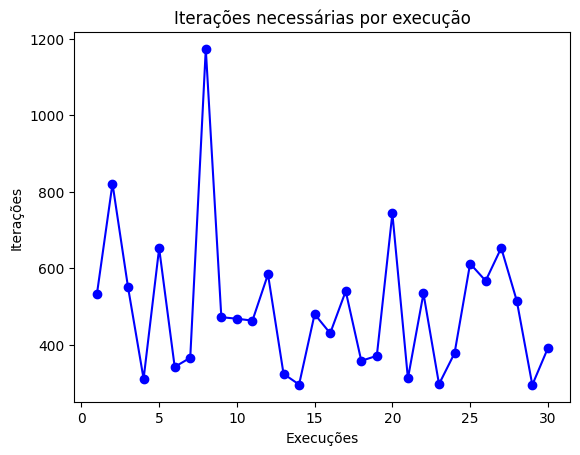

In [ ]:
plt.plot(range(1, 31), iterations_per_exec, marker='o', linestyle='-', color='b')
plt.title('Iterações necessárias por execução')
plt.xlabel('Execuções')
plt.ylabel('Iterações')
plt.show()

In [ ]:
print("Média de iterações:", np.average(iterations_per_exec))
print("Desvio padrão das iterações:", np.std(iterations_per_exec))

Média de iterações: 494.3666666666667
Desvio padrão das iterações: 185.57091786041138


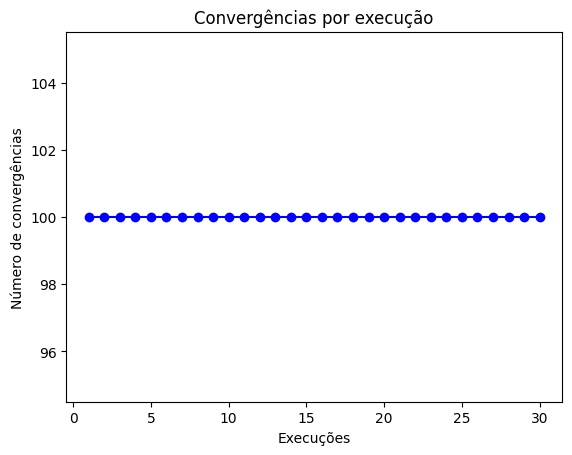

In [ ]:
plt.plot(range(1, 31),  convergences_per_exec, marker='o', linestyle='-', color='b')
plt.title('Convergências por execução')
plt.xlabel('Execuções')
plt.ylabel('Número de convergências')
plt.show()

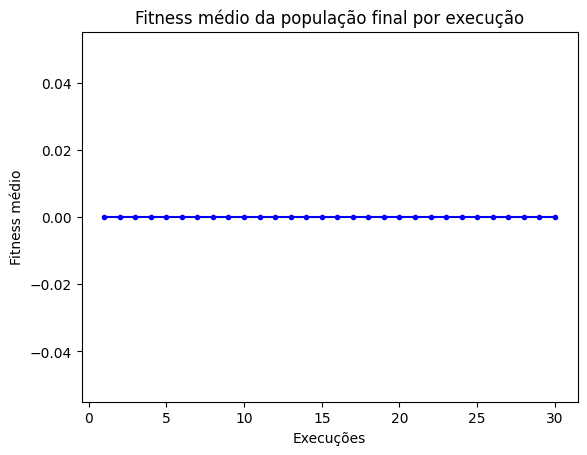

In [ ]:
plt.plot(range(1, 31),  avgfit_per_exec, marker='.', linestyle='-', color='b')
plt.title('Fitness médio da população final por execução')
plt.xlabel('Execuções')
plt.ylabel('Fitness médio')
plt.show()

In [ ]:
print("Média do Fitness Médio nas 30 execuções:", np.average(avgfit_per_exec))
print("Desvio Padrão do Fitness Médio nas 30 execuções:", np.std(avgfit_per_exec))

Média do Fitness Médio nas 30 execuções: 0.0
Desvio Padrão do Fitness Médio nas 30 execuções: 0.0


### Análise de uma população

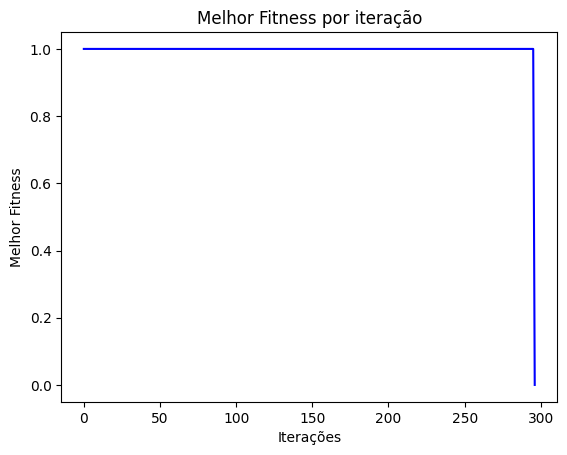

In [ ]:
plt.plot(range(iteration+1), best_fit_progress, linestyle='-', color='b')
plt.title('Melhor Fitness por iteração')
plt.xlabel('Iterações')
plt.ylabel('Melhor Fitness')
plt.show()

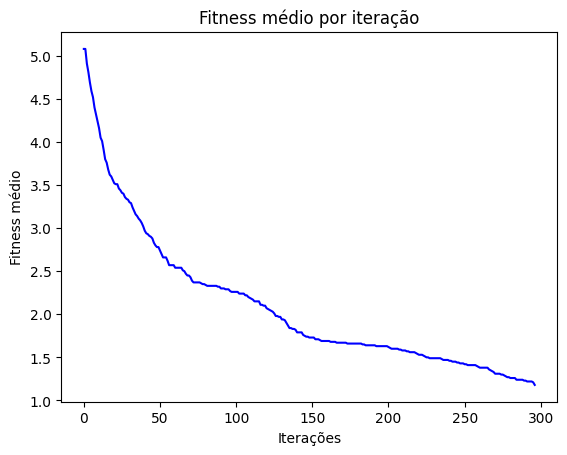

In [ ]:
plt.plot(range(iteration+1), avgfit_progress, linestyle='-', color='b')
plt.title('Fitness médio por iteração')
plt.xlabel('Iterações')
plt.ylabel('Fitness médio')
plt.show()

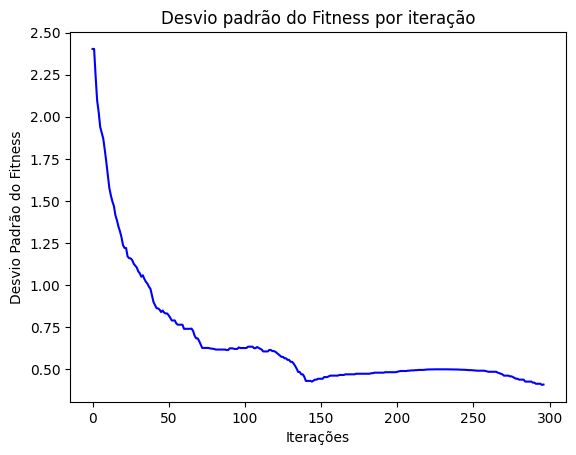

In [ ]:
plt.plot(range(iteration+1), fitstd_progress, linestyle='-', color='b')
plt.title('Desvio padrão do Fitness por iteração')
plt.xlabel('Iterações')
plt.ylabel('Desvio Padrão do Fitness')
plt.show()

In [ ]:
table = Table(title="Evolução de uma população")
table.add_column("Geração", justify="center", vertical="middle")
table.add_column("Melhor Indivíduo", width=60, justify="center", vertical="middle")
table.add_column("Melhor Fitness", justify="center", vertical="middle")
table.add_column("Fitness Médio", justify="center", vertical="middle")
table.add_column("Desvio Padrão do Fitness", justify="center", vertical="middle")

for i in range(iteration+1):
  table.add_row(str(i), str(best_ind_progress[i]), str(best_fit_progress[i]), str("%.2f" % avgfit_progress[i]), str("%.2f" % fitstd_progress[i]))

console = Console()
console.print(table)

                                             Evolução de uma população                                             
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃         ┃                                                              ┃             ┃             ┃   Desvio   ┃
┃         ┃                                                              ┃   Melhor    ┃   Fitness   ┃ Padrão do  ┃
┃ Geração ┃                       Melhor Indivíduo                       ┃   Fitness   ┃    Médio    ┃  Fitness   ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│    0    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    5.08     │    2.40    │
│    1    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    5.08     │    2.40    │
│    2    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.91     │    2.24    │
│    3    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.81     │    2.10    │
│    4    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.69     │    2.03    │
│    5    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.59     │    1.94    │
│    6    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.52     │    1.91    │
│    7    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.40     │    1.87    │
│    8    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.32     │    1.80    │
│    9    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.24     │    1.73    │
│   10    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.16     │    1.65    │
│   11    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.05     │    1.58    │
│   12    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    4.01     │    1.53    │
│   13    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.91     │    1.50    │
│   14    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.80     │    1.47    │
│   15    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.76     │    1.42    │
│   16    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.68     │    1.38    │
│   17    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.62     │    1.35    │
│   18    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.60     │    1.32    │
│   19    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.56     │    1.28    │
│   20    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.52     │    1.24    │
│   21    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.51     │    1.22    │
│   22    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.51     │    1.22    │
│   23    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.46     │    1.17    │
│   24    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.44     │    1.16    │
│   25    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.41     │    1.16    │
│   26    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.40     │    1.15    │
│   27    │   ['110', '100', '001', '011', '101', '111', '010', '000']   │      1      │    3.36     │    1.13    │
│   28    │   ['110', '100', '001', '011', '101', '111',